<center><h1>Hou_Shengtao_HW1</h1></center>
<center><h1>Shengtao Hou</h1><h2>Github Username: Tonyhou521</h2><h3>USC ID: 9712707229</h3></center>
<center><font size="4">Vertebral Column Data</font></center>

### (a) Download Data

Package imports

In [1]:
from scipy.io import arff
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.neighbors import DistanceMetric
import numpy as np
from pretty_confusion_matrix import pp_matrix

Get the Vertebral Column Data Set

In [2]:
## Loading the column 2c file
data = arff.loadarff('../data/vertebral_column_data/column_2C_weka.arff')
df = pd.DataFrame(data[0])
df.head()


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

[b'Abnormal' b'Normal']


Text(0.5, 0.98, 'Scatterplots of the independent variables with colors to represent Class 0 and 1')

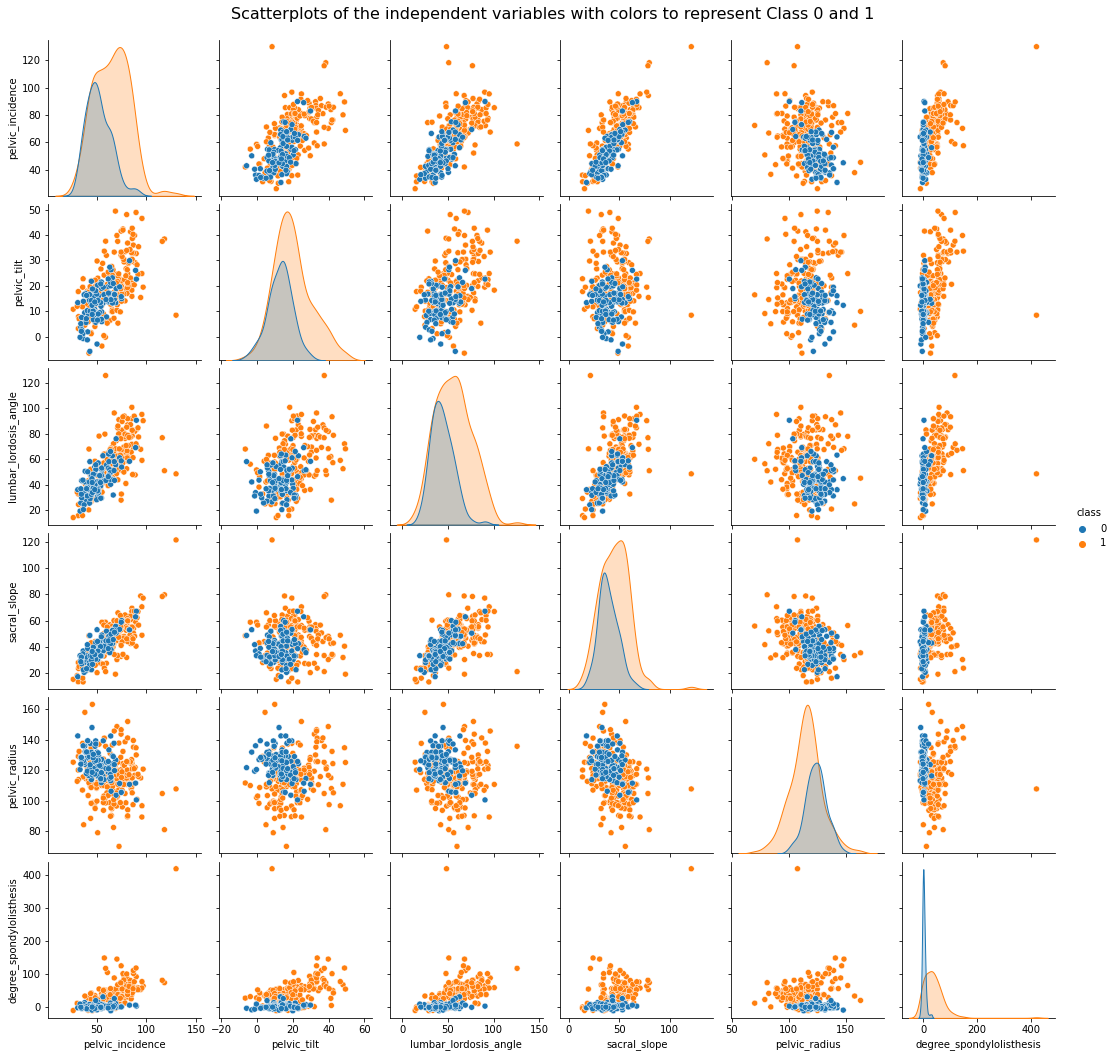

In [3]:
## Check the class column to see if there are only two classes one being Abnormal and the other being Normal
print(df['class'].unique())

## Transforming the class column to 0 and 1 according to the guideline
df['class'] = df['class'].apply(lambda x: 1 if x == b'Abnormal' else 0)

g = sns.pairplot(df, hue='class')
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Scatterplots of the independent variables with colors to represent Class 0 and 1', fontsize=16)

#### ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

<AxesSubplot:xlabel='class', ylabel='degree_spondylolisthesis'>

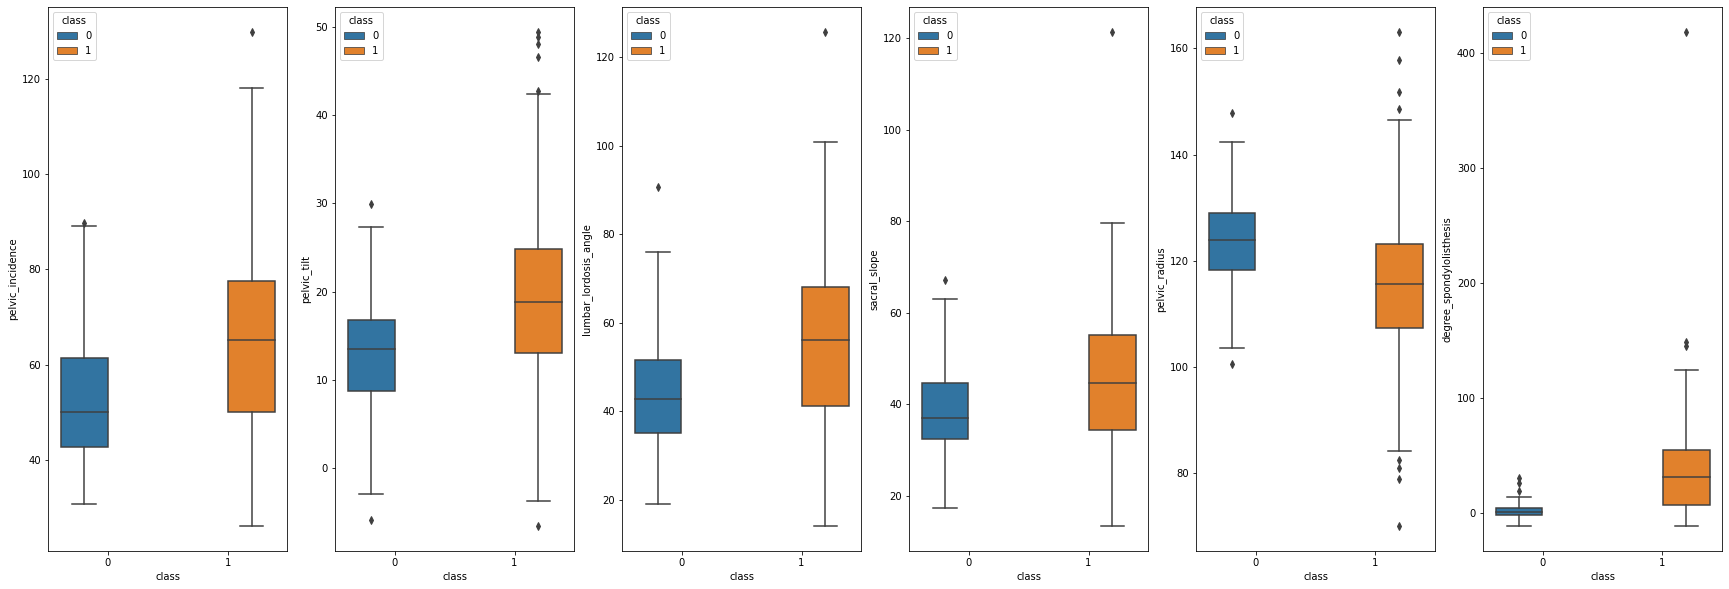

In [4]:
fig, axes = plt.subplots(1, 6, figsize=(30, 10))
sns.boxplot(x='class', y='pelvic_incidence', hue='class', data=df, ax=axes[0])
sns.boxplot(x='class', y='pelvic_tilt', hue='class', data=df, ax=axes[1])
sns.boxplot(x='class', y='lumbar_lordosis_angle', hue='class', data=df, ax=axes[2])
sns.boxplot(x='class', y='sacral_slope', hue='class', data=df, ax=axes[3])
sns.boxplot(x='class', y='pelvic_radius', hue='class', data=df, ax=axes[4])
sns.boxplot(x='class', y='degree_spondylolisthesis', hue='class', data=df, ax=axes[5])

#### iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [5]:
## first 70 rows of class 0 and first 140 rows of class 1 as training data
train_0 = df.loc[df['class'] == 0].iloc[:70]
train_1 = df.loc[df['class'] == 1].iloc[:140]

## rest as test dataset
test_0 = df.loc[df['class'] == 0].iloc[70:]
test_1 = df.loc[df['class'] == 1].iloc[140:]

## Concatenate the training data and test data
train = pd.concat([train_0, train_1])
test = pd.concat([test_0, test_1])

## Split the training data and test data into X and y
## drop function parameter 'axis' indicates that we'd like to drop column class
X_train = train.drop('class',axis = 1)
y_train = train['class']
X_test = test.drop('class', axis=1)
y_test = test['class']

### (c) Classification

#### i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [6]:
## Ask user to input k
k = int(input('Please input the value of k: '))

## Generating the model
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

# Train the model using the training sets
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

## Evaluate the model and calculate the accuracy
print("The accuracy of the model with a k value of", k, "is", metrics.accuracy_score(y_test, y_pred)," and the misclassification rate is", 1 - metrics.accuracy_score(y_test, y_pred))

The accuracy of the model with a k value of 4 is 0.94  and the misclassification rate is 0.06000000000000005


#### ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗.

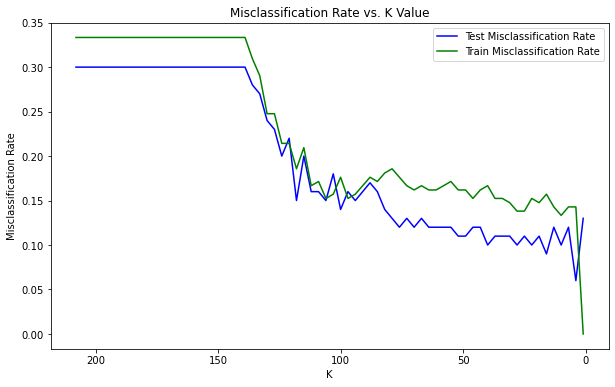

The minimum error rate is 0.06000000000000005 and the corresponding k value is 4


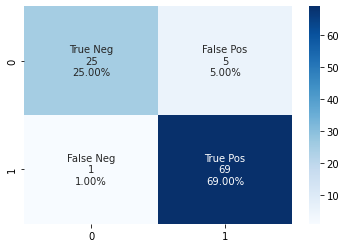

The precision of the model is 0.9324324324324325
The F1 score of the model is 0.9583333333333333


In [7]:
## Generating the k values from 208 to 1 with three increments
k_values = list(range(208, 0, -3))

## Generating an empty list to store the ME
test_error = {}
train_error = {}

## Looping through the k values and calculate ME for each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    test_error[k] = 1 - metrics.accuracy_score(y_test, y_pred)
    y_pred_train = knn.predict(X_train)
    train_error[k] = 1 - metrics.accuracy_score(y_train, y_pred_train)


plt.figure(figsize=(10,6))
plt.plot(list(test_error.keys()), list(test_error.values()),color='blue',markerfacecolor='red', markersize=10, label = 'Test Misclassification Rate')
plt.plot(list(train_error.keys()), list(train_error.values()),color='green',markerfacecolor='red', markersize=10, label = 'Train Misclassification Rate')
# reverse x axis
plt.gca().invert_xaxis()
plt.legend()
plt.title('Misclassification Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Misclassification Rate')
plt.show()

#iterate through the dictionary to find the minimum error and the corresponding k value
for k in test_error.keys():
    if test_error[k] == min(test_error.values()):
        print("The minimum error rate is", min(test_error.values()), "and the corresponding k value is", k)


## Since we find that the most suitable k is 4, we will use k = 4 to generate the confusion matrix
knn = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

## Generate the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

##sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

group_names = ['True Neg','False Pos','False Neg','True Pos']


group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.show()

## Caculate the precision and F1 score
precision = metrics.precision_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
print("The precision of the model is", precision)
print("The F1 score of the model is", f1_score)


K=4 is when we had the lowest test misclassification rate  and therefore should be the optimal k value here.
True Positive rate and True Negative rate are as shown above in the confusion matrix graph to be 69% and 25% respectively.
We can compute the precision(so called positive predictive value) manually by using the formula TP/(TP+FP) which equate to the result we get from the builtin precision function in scikit learn. (93.2%)
We can also compute the F1-score(measure of test's accuracy) using the formula 2TP/(2TP+FP+FN), which equate to the result we get from the buildin F1_score function in scikitlearn. (95.8%)

#### iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate,3 which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30,...,210}.4 Note: for each N, select your training set by choosing the first ⌊N/3⌋ rows of Class 0 and the first N − ⌊N/3⌋ rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1,6,11,...,196}. This plot is called a Learning Curve.


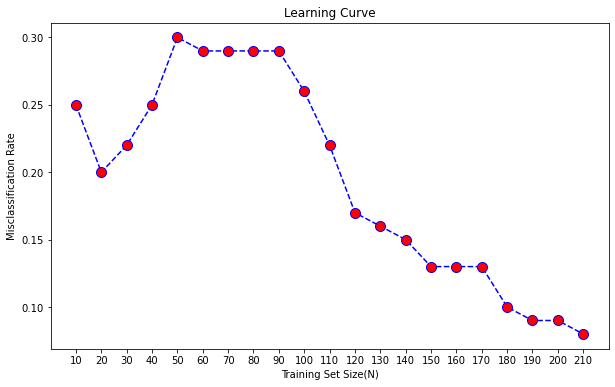

In [8]:
## Invovles the training set we've created from above
error = {}

for n in range(10,211,10):
    value = int(n/3)
    Train_0 = train_0.iloc[:value]
    Train_1 = train_1.iloc[:(n-value)]
    Train = pd.concat([Train_0, Train_1])
    X_Train = Train.drop('class',axis = 1)
    y_Train = Train['class']
    ME = []
    for k in range(1,n,5):
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(X_Train,y_Train)
        y_pred = knn.predict(X_test)
        ME.append(1- metrics.accuracy_score(y_test, y_pred))
    error[n] = min(ME)

# learning curve
plt.figure(figsize=(10,6))
plt.plot(list(error.keys()), list(error.values()),color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
#plt tick to (10,211,10)
plt.xticks(np.arange(10, 211, 10))
plt.title('Learning Curve')
plt.xlabel('Training Set Size(N)')
plt.ylabel('Misclassification Rate')
plt.show()

#### i. Minkowski Distance. Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1,6,11,...,196}.

In [9]:
## Initializing the table to store the results
table = pd.DataFrame(columns=['Distance Metrics','k','Test Misclassification Rate'])

##### i Minkowski Distance

##### A. Manhattan Distance with p = 1.

In [10]:
## Generating the k values from 208 to 1 with three increments
k_values = list(range(1,200,5))

## Generating an empty list to store the MSE
error = {}

## Looping through the k values and calculate MSE for each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, p = 1)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error[k] = (1 - metrics.accuracy_score(y_test, y_pred))

res = {}
##Getting all the key values for the minimum values
for k in error.keys():
    if error[k] == min(error.values()):
        res[k] = error[k]

## get res max key value
max_key = max(res.keys())
max_value = res[max_key]
print("The minimum error rate for the Manhattan Distance is", max_value, "and the corresponding k value is", max_key)

## append the results to the table
table = table.append({'Distance Metrics':'Manhattan Distance','k':max_key,'Test Misclassification Rate':max_value}, ignore_index=True)

The minimum error rate for the Manhattan Distance is 0.10999999999999999 and the corresponding k value is 26


/var/folders/lr/t56cr6pd4c5f6k7tv_cjmhd80000gn/T/ipykernel_66430/780211304.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Distance Metrics':'Manhattan Distance','k':max_key,'Test Misclassification Rate':max_value}, ignore_index=True)


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [11]:
p_values = []
pp = []
for x in range(1,11):
    pp.append(x/10)

import math

for p in pp:
    ## append 10^p
    p_values.append(math.pow(10,p))

## Generating an empty list to store the MSE
error = {}

## Looping through the k values and calculate MSE for each k value
for each in p_values:
    knn = KNeighborsClassifier(n_neighbors=26, p = each)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error[each] = (1- metrics.accuracy_score(y_test, y_pred))


res = {}
##Getting all the key values for the minimum values
for k in error.keys():
    if error[k] == min(error.values()):
        res[k] = error[k]


for k,v in res.items():
    print("log(p) = ", round(math.log(k,10),1) , "when p equals to", k, "and the corresponding error rate is", v)

## append the results to the table
table = table.append({'Distance Metrics':'Minkowski Distance','k':26,'Test Misclassification Rate':list(res.values())[0]}, ignore_index=True)

log(p) =  0.1 when p equals to 1.2589254117941673 and the corresponding error rate is 0.09999999999999998
log(p) =  0.2 when p equals to 1.5848931924611136 and the corresponding error rate is 0.09999999999999998
log(p) =  0.4 when p equals to 2.51188643150958 and the corresponding error rate is 0.09999999999999998
log(p) =  0.6 when p equals to 3.9810717055349722 and the corresponding error rate is 0.09999999999999998


/var/folders/lr/t56cr6pd4c5f6k7tv_cjmhd80000gn/T/ipykernel_66430/2368014317.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Distance Metrics':'Minkowski Distance','k':26,'Test Misclassification Rate':list(res.values())[0]}, ignore_index=True)


Here multiple p values generated the minimum error rate (0.09999999999999998).

##### C. Chebyshev Distance With p -> infinity.

In [12]:
## Generating the k values from 208 to 1 with three increments
k_values = list(range(1,200,5))

## Generating an empty list to store the MSE
error = {}

## Looping through the k values and calculate MSE for each k value
for k in k_values:
    ## set p to infinity
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'chebyshev')
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error[k] = round(1- metrics.accuracy_score(y_test, y_pred),2)

res = {}
##Getting all the key values for the minimum values
for k in error.keys():
    if error[k] == min(error.values()):
        res[k] = error[k]

## get res max key value
max_key = max(res.keys())
max_value = res[max_key]
print("The minimum error rate for the Chebyshev Distance is", max_value, "and the corresponding k value is", max_key)

## append the results to the table
table = table.append({'Distance Metrics':'Chebyshev Distance','k':max_key,'Test Misclassification Rate':max_value}, ignore_index=True)

The minimum error rate for the Chebyshev Distance is 0.08 and the corresponding k value is 16


/var/folders/lr/t56cr6pd4c5f6k7tv_cjmhd80000gn/T/ipykernel_66430/2076140243.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Distance Metrics':'Chebyshev Distance','k':max_key,'Test Misclassification Rate':max_value}, ignore_index=True)


#### ii. Mahalanobis Distance.

In [13]:
## Generating the k values from 208 to 1 with three increments
k_values = list(range(1,200,5))

## Generating an empty list to store the MSE
error = {}

## Looping through the k values and calculate MSE for each k value
for k in k_values:
    ## set p to infinity
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'mahalanobis', metric_params={'VI': np.cov(X_train,rowvar=False)})
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error[k] = round(1- metrics.accuracy_score(y_test, y_pred),2)

res = {}
##Getting all the key values for the minimum values
for k in error.keys():
    if error[k] == min(error.values()):
        res[k] = error[k]

## get res max key value
max_key = max(res.keys())
max_value = res[max_key]
print("The minimum error rate for the Mahalanobis Distance is", max_value, "and the corresponding k value is", max_key)

## append the results to the table
table = table.append({'Distance Metrics':'Mahalanobis Distance','k':max_key,'Test Misclassification Rate':max_value}, ignore_index=True)


The minimum error rate for the Mahalanobis Distance is 0.08 and the corresponding k value is 116


/var/folders/lr/t56cr6pd4c5f6k7tv_cjmhd80000gn/T/ipykernel_66430/1409956897.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Distance Metrics':'Mahalanobis Distance','k':max_key,'Test Misclassification Rate':max_value}, ignore_index=True)


In [14]:
## Output table to a dataframe
print("Table for majority voting polling")
display(table)

Table for majority voting polling


,Distance Metrics,k,Test Misclassification Rate
0,Manhattan Distance,26,0.11
1,Minkowski Distance,26,0.1
2,Chebyshev Distance,16,0.08
3,Mahalanobis Distance,116,0.08


### (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}.

## Initializing a new table

In [15]:
table2 = pd.DataFrame(columns=['Distance Metrics','k','Test Misclassification Rate'])

## Euclidean Distance

In [16]:
k_values = list(range(1,200,5))

## Generating an empty list to store the MSE
error = {}

## Looping through the k values and calculate MSE for each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean',weights = 'distance')
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error[k] = (1 - metrics.accuracy_score(y_test, y_pred))

res = {}

##Getting all the key values for the minimum values
for k in error.keys():
    if error[k] == min(error.values()):
        res[k] = error[k]

## get res max key value
max_key = max(res.keys())
max_value = res[max_key]
print("The minimum error rate for the Manhattan Distance is", max_value, "and the corresponding k value is", max_key)

## append the results to the table
table2 = table2.append({'Distance Metrics':'Euclidean Distance','k':max_key,'Test Misclassification Rate':max_value}, ignore_index=True)

The minimum error rate for the Manhattan Distance is 0.09999999999999998 and the corresponding k value is 6


/var/folders/lr/t56cr6pd4c5f6k7tv_cjmhd80000gn/T/ipykernel_66430/2294033295.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table2 = table2.append({'Distance Metrics':'Euclidean Distance','k':max_key,'Test Misclassification Rate':max_value}, ignore_index=True)


## Manhattan Distance

In [17]:
## Generating the k values from 208 to 1 with three increments
k_values = list(range(1,200,5))

## Generating an empty list to store the MSE
error = {}

## Looping through the k values and calculate MSE for each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, p = 1, weights = 'distance')
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error[k] = (1 - metrics.accuracy_score(y_test, y_pred))

res = {}

##Getting all the key values for the minimum values
for k in error.keys():
    if error[k] == min(error.values()):
        res[k] = error[k]


## get res max key value
max_key = max(res.keys())
max_value = res[max_key]
print("The minimum error rate for the Manhattan Distance is", max_value, "and the corresponding k value is", max_key)

## append the results to the table
table2 = table2.append({'Distance Metrics':'Manhattan Distance','k':max_key,'Test Misclassification Rate':max_value}, ignore_index=True)

The minimum error rate for the Manhattan Distance is 0.09999999999999998 and the corresponding k value is 26


/var/folders/lr/t56cr6pd4c5f6k7tv_cjmhd80000gn/T/ipykernel_66430/2245126759.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table2 = table2.append({'Distance Metrics':'Manhattan Distance','k':max_key,'Test Misclassification Rate':max_value}, ignore_index=True)


## Chebyshev distance

In [18]:
## Generating the k values from 208 to 1 with three increments
k_values = list(range(1,200,5))

## Generating an empty list to store the MSE
error = {}

## Looping through the k values and calculate MSE for each k value
for k in k_values:
    ## set p to infinity
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'chebyshev', weights = 'distance')
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error[k] = round(1- metrics.accuracy_score(y_test, y_pred),2)

res = {}
##Getting all the key values for the minimum values
for k in error.keys():
    if error[k] == min(error.values()):
        res[k] = error[k]

## get res max key value
max_key = max(res.keys())
max_value = res[max_key]
print("The minimum error rate for the Chebyshev Distance is", max_value, "and the corresponding k value is", max_key)

## append the results to the table
table2 = table2.append({'Distance Metrics':'Chebyshev Distance','k':max_key,'Test Misclassification Rate':max_value}, ignore_index=True)

The minimum error rate for the Chebyshev Distance is 0.11 and the corresponding k value is 61


/var/folders/lr/t56cr6pd4c5f6k7tv_cjmhd80000gn/T/ipykernel_66430/467471034.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table2 = table2.append({'Distance Metrics':'Chebyshev Distance','k':max_key,'Test Misclassification Rate':max_value}, ignore_index=True)


In [19]:
print("Table for Weight Decision Polling")
display(table2)

Table for Weight Decision Polling


,Distance Metrics,k,Test Misclassification Rate
0,Euclidean Distance,6,0.1
1,Manhattan Distance,26,0.1
2,Chebyshev Distance,61,0.11


### (f) Training Error Rate

The lowest training error I got from this homework is 0 when k value is 1. The reason why is because we are passing the same dataset we used to train the model to predict itself.

Additional explaination: https://stackoverflow.com/questions/61541204/why-training-error-varies-with-value-of-k-in-knn

## Reference and Citations

1. Visualization of the confusion matrix: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fe

2. Scikitlearn official website about sklearn.metrics.confusion_matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

3. Understanding Confusion Matrix and Applying it on KNN_Classifier: https://plainenglish.io/blog/understanding-confusion-matrix-and-applying-it-on-knn-classifier-on-iris-dataset-b57f85d05cd8

4. How to measure the MSE error with KNN model from stack overflow using scikit learn function: https://stackoverflow.com/questions/67484554/how-can-i-measure-the-mse-error-with-knn-model

5. How to find the optimal k in KNN model and a working example: https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb

6. Wikipedia page about the formula of precision and F1-Score: https://en.wikipedia.org/wiki/Confusion_matrix

7.  np.cov doc and how rowvar parameter works: https://numpy.org/doc/stable/reference/generated/numpy.cov.html

8. How to setup parameters for Mahalanobis Distance Calculation: https://stackoverflow.com/questions/45031509/using-alternative-distance-metrics-like-mahalanobis-with-dbscan
